In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('stats.csv', delimiter=';')
print(df.columns.tolist())

['Uses Octree', 'Spheres', 'Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Width', 'Screen Height', 'Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']


In [21]:
# prep columns in df
df['Uses Octree'] = df['Uses Octree'].astype(int) 
df['Spheres'] = df['Spheres'].astype(int) 
df['Max Octree Depth'] = df['Max Octree Depth'].astype(int)
df['Num Samples'] = df['Num Samples'].astype(int)
df['Max Rays Depth'] = df['Max Rays Depth'].astype(int)
df['Screen Width'] = df['Screen Width'].astype(int)
df['Screen Height'] = df['Screen Height'].astype(int)
df['Min'] = df['Min'].astype(float)
df['Max'] = df['Max'].astype(float)
df['Avg'] = df['Avg'].astype(float)
df['Min FPS'] = df['Min FPS'].astype(float)
df['Max FPS'] = df['Max FPS'].astype(float)
df['Avg FPS'] = df['Avg FPS'].astype(float)

In [26]:

df_octree = df[df['Uses Octree'] == 1]
df_no_octree = df[df['Uses Octree'] == 0]

In [27]:
print(df_octree)

     Uses Octree  Spheres  Max Octree Depth  Num Samples  Max Rays Depth  \
90             1       10                 1            4               4   
91             1       10                 5            4               4   
92             1       10                10            4               4   
93             1       10                 1            4               4   
94             1       10                 5            4               4   
..           ...      ...               ...          ...             ...   
355            1     1000                 5           32              16   
356            1     1000                10           32              16   
357            1     1000                 1           32              16   
358            1     1000                 5           32              16   
359            1     1000                10           32              16   

     Screen Width  Screen Height       Min       Max       Avg     Min FPS  \
90       

Correlation between variables and metrics:
                       Min       Max       Avg   Min FPS   Max FPS   Avg FPS
Spheres           0.556368  0.562374  0.557093 -0.608817 -0.209591 -0.614905
Max Octree Depth -0.008478 -0.004767 -0.005924 -0.059412 -0.025789 -0.059213
Num Samples       0.390320  0.402317  0.397076 -0.283693  0.023750 -0.265475
Max Rays Depth    0.048722  0.051398  0.051749 -0.011199 -0.053836 -0.022932
Screen Height     0.337600  0.338980  0.339710 -0.199061 -0.074267 -0.187544


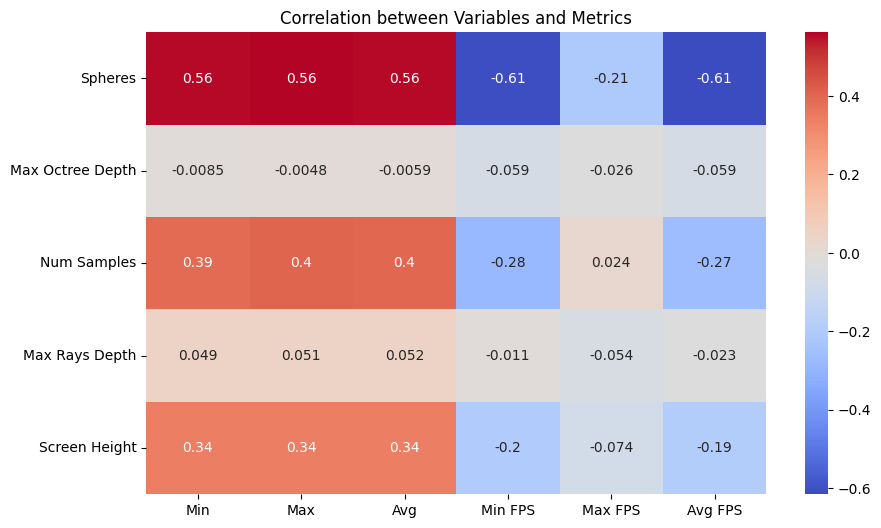

In [31]:
import seaborn as sns

# Calculate the correlation matrix between the 6 variables and the 6 metrics
variables = ['Spheres', 'Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Height']
metrics = ['Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']

correlation = df_octree[variables + metrics].corr().loc[variables, metrics]
print("Correlation between variables and metrics:")
print(correlation)

# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Metrics')
plt.show()

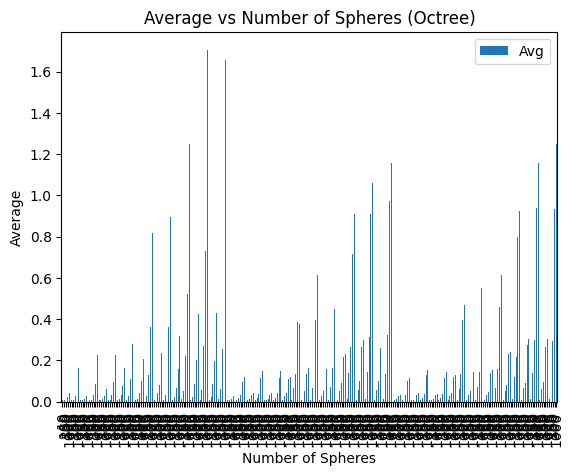

In [ ]:
group_cols = ['Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Height', 'Spheres']
avg_by_spheres = df_octree.groupby(group_cols)['Avg'].mean().reset_index()
avg_by_spheres.plot(x='Spheres', y='Avg', kind='bar')
# Specify the values for the grouping columns
selected = avg_by_spheres[
    (avg_by_spheres['Max Octree Depth'] == 4) &
    (avg_by_spheres['Num Samples'] == 4) &
    (avg_by_spheres['Max Rays Depth'] == 4) &
    (avg_by_spheres['Screen Height'] == 600)
]

plt.xlabel('Number of Spheres')
plt.bar(selected['Spheres'], selected['Avg'])
plt.ylabel('Average')
plt.title('Average vs Number of Spheres (Octree)')
plt.show()

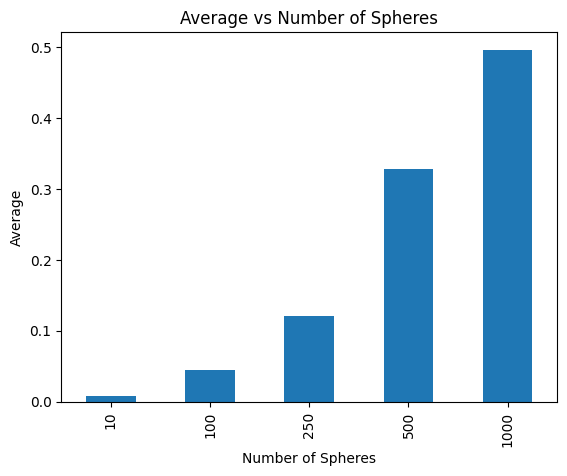

In [28]:
df.groupby('Spheres')['Avg'].mean().plot(kind='bar')
plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres')
plt.show()